## Preamble

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import describe
pd.options.display.max_columns = 12
pd.options.display.max_rows = 24

# disable warnings in Anaconda
import warnings
warnings.simplefilter('ignore')

# plots inisde jupyter notebook
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style='darkgrid', palette='muted')
color_scheme = {
    'red': '#F1637A',
    'green': '#6ABB3E',
    'blue': '#3D8DEA',
    'black': '#000000'
}

import datetime as dt
import sklearn.linear_model as lm

In [2]:
def smape(y_pred, y_true):
    # calculate error
    denom = (abs(y_pred) + abs(y_true)) / 2
    errors = abs(y_pred - y_true) / denom
    return 100 * np.sum(errors) / len(y_true)

In [3]:
def serie_split(s, fcast_len = 90):
    """
    We split our datasets: year 2017 is used for validation and the rest is for training.
    As our goal is to predict the first 90 days of 2018, we use only the first 90 days for validation.
    """
    train = s.iloc[s.index < '2017-01-01']
    test = s.iloc[s.index >= '2017-01-01'].iloc[:fcast_len]
    
    return train, test

In [4]:
from rolling import Rolling

## Load data
In order for this to work, download all datasets from kaggle competition:  
https://www.kaggle.com/c/demand-forecasting-kernels-only  
and place them in `../data/` folder.  
We could not append datasets to our repo because of copyrights.

In [6]:
df = pd.read_csv('../data/train.csv')
df['date'] = pd.to_datetime(df['date'])
df.index = pd.DatetimeIndex(df['date'])

## Training

In [7]:
def train_and_predict(model, serie):
    r = Rolling(window=365)

    train, test = serie_split(serie)
    train_X, train_y = r.make_training_data(train)

    model.fit(train_X, train_y)

    y = r.predict(model.predict, train)

    return y, test

In [8]:
def run_all_storeitems(model):
    errors = []
    for store in range(1,11):
        for item in range(1,51):
            sales = df[(df["store"] == store) & (df["item"] == item)]["sales"]
            predicted, real = train_and_predict(model, sales)
            error = smape(predicted, real)
            print(error)
            errors.append(error)
    return errors

## Linear Regression

In [10]:
errors = run_all_storeitems(lm.LinearRegression())

25.203316830267866
15.244120296465109
17.75784847729047
23.50237651519514
28.01676320471413
15.789179945537567
17.698184128999298
12.721306337310617
18.30162672331483
15.257739668603636
14.784842808758079
15.351243033955045
12.430152065602215
16.13064589699464
12.642659677895656
23.9201792901176
21.104349123411346
15.557484731589248
18.679747754188668
17.185749772193567
21.535726523466003
17.599924260958918
23.131070606197525
15.853342632158176
13.378206194931133
17.83008162352631
26.081715193959866
15.77683502233139
17.58911428045642
17.891557592304856
18.18679337119375
20.527668934239696
14.543658904656635
21.916277371181387
16.296627300910302
12.342402754051962
23.181282862430464
14.304440546316163
18.563123519485778
22.99218633197199
25.886027941336977
20.275933750867996
18.881938045802034
20.407343575250167
11.832731601192107
16.373438851196603
22.83788961921891
18.37211305639853
21.029730660673053
14.490257434973698
20.073838153341384
12.557587396110987
17.710714899752208
21.6770

17.958192744920996
15.59911745304676
20.95939716572004
11.986693390558225
15.706381238579185
24.888263383219673
18.033349119969913
21.962061564925914
14.250225403759636
24.767945877491723
14.975709458199862
18.743714645855388
23.163431333142828
22.655908147916197
12.67947669737187
13.601927988345915
12.521509933282154
16.138065288969244
14.763245727948664
13.148626375977207
14.809354009166478
12.214525768187668
14.79435396914013
12.541125127475233
22.720533898081793
20.745194420686467
11.402961157916478
19.830300664959008
19.12558380168076
15.242033813275368
12.887333873845282
18.826278667320036
16.486742245221
10.919306304363104
19.103680042951968
20.368347355771714
11.484350001803902
11.902034787328832
16.86544594766616
16.936084995650297
19.016397488593125
13.327279273031111
26.61679748882723
16.583255712323897
12.785121660768768
18.55306502027465
12.249481590567376
16.619241654743952
18.84350662021926
27.51688181994342
20.91079809766373
14.076630798537943
20.450538018827874
14.0242

In [11]:
print(f"SMAPE = {np.mean(errors)}")

SMAPE = 17.96796983104712


/home/kowal/anaconda3/envs/tf/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


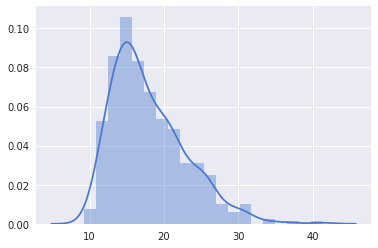

In [12]:
sns.distplot(errors)
plt.show()

## ElasticNet

In [10]:
errors = run_all_storeitems(lm.ElasticNet())

22.908055039879113
14.242268093428457
15.83362433442583
19.837191680545388
25.514251459261686
14.880375153557582
15.790438270373329
11.826767892682048


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



15.634460728137732
13.729657473479596
13.494506283608361
14.190822149071701
11.386803535755766
14.772761432411027
12.163245766066995
20.402368915966523
17.419302646385
14.7389596179587
15.960622506312683
15.125635840790707
18.73342649206429
15.893620013079662
18.690209173375308
14.316002916863022
11.9673120738425
15.932692124997354
23.445990930181853
15.047599200866545
16.381993595296382
15.763744936831891
16.824618924348158
16.592651415542548
13.70779607091122
18.85062642039606
14.44718489449568


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



11.159756844401864
19.673318304274446


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



13.177937260366773
16.009998577179445
19.76886437848395
21.225187693745713
16.992931116481483
16.486183598062876
18.298092352867506
11.732920244601463
14.259345259262359
19.80353086543942
15.57680848757005
18.097729878272812
13.042283747838885
17.406569200550177
12.077988313318142
14.952641835747686
18.0259380750861
23.066244302951933
12.884724536275776
11.408373314461583


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



11.801486733950632
13.939369235178301
10.541247492831078
10.73622684161302


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



14.055395470687632
11.032252887726335
12.749743828880982
13.870296289000699


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



17.31182114559879
16.87510674758307
10.214945142665393
13.211212959692132
14.197895053717115
13.982774243013818


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



12.489251637245628
18.709869501277026


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



13.834065962243518
10.009566233140852
13.873347164587754
16.85491643273881


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



12.799693292910277
12.350354967852864
17.44245675822523
13.276115227497872
14.937694052050379
9.409126369120171
20.458673053942466
12.241954509394342
13.254387473320502
16.24371119223539
11.080537466801642
13.123667846335897
16.59469244632247
20.785172092070358
16.5886122015478
13.442947931414265
17.753590873973295


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



10.721510928357914
12.037600440093213
20.172797067615694
10.88114516032931
18.34369688093941


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



12.257332916270416
16.34778002177003
14.58654635404881
16.472777229253094
18.919660780278626
19.029479579137746
15.746804736416301
13.665315077380939
13.315370687608022
14.994114018922348
10.552598998381994
12.055956097226336


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



11.738793416483936
10.584417884731801
14.50962667945162
15.326882449264957


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



18.744486330939157
15.746755463034914
10.51432082052611
16.416393986638646
13.881313370082689
15.102861482796298
12.269740555799899
16.591615078646637
12.521320755882746
11.921237527472288
14.59727407380608
17.448809183963707


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



11.71995640792511
12.860429152023084
19.411417384675254
13.482604085147482
14.774846186391228
12.784051890455139


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



17.825313431637333
11.83899905571337
11.97927733651998
17.15693506132592


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



11.011074029577673
16.580016876686507
16.609854961809653
21.61348632675683
16.220567364185868
13.61537933386174
15.765120376854583
12.727043867947726
13.59359333156034
21.86536167411132
13.254010223330074
16.431657233768565
10.812148235371003


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



21.967719252908378
13.292895219301396
15.811829347952672
21.116256758879956
22.687369893063057
13.436429416361278
16.877188152606404
12.25704908120273
15.26110646358428


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



12.956706101598709
13.688431976890572
11.916296997884004
11.04231500128041
13.50811736196543
10.824262875066209
21.660311203672137


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



15.521266881924625
12.454943864833623
16.500949060589193
13.412232368116046
13.674641521932264
13.189439244215984
17.935080399400203
14.363647502793524


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



12.32757726994728
14.69397944111502
24.544662063154178
10.772785613485356
14.315390678944226
13.60244592030793
13.681166668039534
17.14457021495027
14.87853651742121
20.57858295052738
15.29505307798753
13.51825931446016
20.391200134045217
12.567712793330251
17.21322709088465
19.340011526859243
21.102092210875636
16.699445065051027
14.383511616604103
21.181567901111162


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



13.12680437034122
12.941883815840372
19.828521264136985
15.996209023647722
18.10240498097384


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



13.785176255381872
22.429845440678495
15.173464192213707
18.718022374435044
27.287365670902627
22.813375678060922
15.190928359947439
15.602828113224179
15.507455426233559
17.450783889864542
11.79247582868131
13.23206592338659
16.305565460453735
13.20523928530585
15.970229634218096
13.076180469404157
23.074987103639565
19.814932143391953
13.709746575278826
16.85095081610557
14.55826637935359
15.5179007378362
12.554016665198969
17.9471362881725
14.921726924668697
15.29064021952874
17.640721655131212
25.343470492736895


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



13.748311975218483
14.513887976782083
16.61746643774052
16.531282552205116
18.498299882286158
17.446461114384952
19.781568111255424
15.342127902182856


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



14.56132522799678
16.07903675018193


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



13.862342138978347
22.63342687041024
21.57751553999956
25.296888784709378
20.414442400591124
15.469685129306756
20.784612230675496
13.816601456609014
14.48100585972414
25.935664506087615
15.028747634138755
19.758151604581577
14.715951153268973
19.80496893831636


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



14.00492333958035
18.437047768625437
19.851032975155146
23.911619949443214
15.584687991940761
15.899770060689743
15.087533642857577
18.572172436953892
14.935236799682457


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



16.552975685513058
14.811964750254257
11.638044179735054
18.603389737483674
12.467112816863878
21.81375730896057
19.982539040062445
13.9156302189571
16.96320239353472
18.522943011794464
17.51355764699103
13.326067008646795
21.75382308292791
13.689022599026384
13.664834113552168
14.997554535628923
20.503267711394646
12.994142267624596


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



13.81513019426733
18.304043091452886
13.85400913913519
15.890212628751465
14.446064197431497
18.830806307188144
18.045872461983524
13.912876809586434


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



20.418355421842687
15.043860521730117
16.68921799493745
25.742983910188954
24.368396571198875
19.210556982918025
16.664382436604868
20.75846867333017
15.881829348329822
14.770438329003532
23.50383143650929
18.46605660375296
20.48398488317201
12.536123181872957
22.92095132101971
15.391249547590608
17.815887410076137
19.4851406959096
31.32682321405754
16.020867104178667
17.971486567548105
14.2150007229483
14.313539957773047
16.123535088503516
17.21721617615336


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



13.934651706415115
12.214331176930086
15.725708072832703
14.295521049456605
24.506098110534033
21.710088894933843
14.279008116987875
18.341199747341964
16.884011930577515
18.682032253730018
13.939142515249962
21.574130165001925
14.970561384018142
14.015713271269286
17.675710808168258
28.384204042004587
12.841465924296772
13.551069800954325
18.525354410354925
17.561230704130722
17.1672415286731
12.972557615807517
22.05668863810731
14.657974870571254
15.5499956202649
21.75222623382447
13.90194761292638
19.754027579802262
19.386057281702058
25.91073225670347
18.799103241495022
17.981610355710767
21.153186555203472
14.111063325980442
16.856542842776882
25.509121163736822
19.770360195627983
22.783707606483592
13.674849210661082
19.74426366197067
12.793540631233787
18.254014563932238
21.711769381449876
19.839325133613883
13.058256999003968


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



12.935751867162564
12.192560435242813


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



13.49716980492156
13.383191661511464
10.440416514913817
13.11259691393416


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



10.320916362740832
13.806332172993805
11.026124078963495
18.699161067512964
17.164541620818827
11.334995554777331
13.42163131388516
13.930743182648497
13.253984501869587
10.752214345898414
16.79978323010872
11.25676838192275
10.871024587401376
13.80506674538595
19.09030434885514
10.900731898022151
14.137739905760688
14.13967700698493
13.13857123505909


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



15.286554499022857
12.94654380632331
17.127202508558362
11.116775856081183
10.647371517355944
17.62614525280131


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



11.78192890516689
14.323680753143925
16.374749949716445
19.134389493386752
16.72812472191907
12.965650638344725
19.988390667627137


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



12.1222661117833
10.685284660951963
17.565997822882967
12.648434374499335
17.702149377854603
13.427571273733742
20.5188034795975
13.631466672436922


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



16.965902603841357
23.191690094829493
23.797648452130534
12.921171791812316
13.945539933853395


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



16.253836198237494
13.947075717423463
10.950717543160087
13.769015011759107
12.868778754162673
14.349954813033694


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



12.998854378177516
12.403467701370605


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



19.060828631659174
17.147067877887753


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



12.626570873101608
18.2444885525437
15.592491303337995
13.756051752612926
11.344815516363642


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



16.31195842863537
15.024081914422117


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



9.923449606341698
14.743959635828352
20.40016618166033
12.975318693623727
14.62590286042633


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



17.19199060350268
14.975446243330303
14.293184608609211
12.278024181103754
18.632445429237052
14.75694870438326
11.979173868046121
17.890186904617117
12.758846076008558


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



15.744699360634137
18.2155037089624
20.78744023815406
16.001856034542953
13.669280376385837
19.167707734702766
11.007818161032203


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



13.885227411473236
20.502944848166553
16.294392913660968
17.66798507087139
13.024276460397124
21.067064810658835
13.759803626057355
17.075111830695143
19.558582138138004
19.963973846426
12.001284165278076
12.51653925938499


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



11.858675126103973
14.481922660457855
13.826572972993967
12.496282210995284
13.595026963075592
11.369433365525534


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



14.267534722415947
11.820184089169924
19.239559102480882
18.534031399135696
10.798213456627805
17.80467514371138
17.439816629135017
14.57846118392824


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



12.092266861458333
17.086766881288987


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



15.782715564891426
10.425834230919115
17.43456032174984
17.31738012953047


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



10.885179667384028
11.110621786148178
15.4417847965141
14.976453071579787
16.966563904223754
12.48698367362857
22.973501313676298
15.08863663804948
12.007065680576208
16.92316982127015
11.471942068638143
14.41356816146541
16.1277600800965
23.10139678522042
17.769128625704408
13.060735788776633
17.432829544871854


/home/radek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



13.261010381430467
13.508304636407633
19.01799818841698
14.49697623612207
16.782461530702978
11.909451036631438


In [11]:
print(f"SMAPE = {np.mean(errors)}")

SMAPE = 15.871759767225456


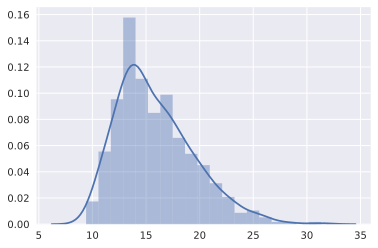

In [12]:
sns.distplot(errors)

## Ridge

In [13]:
errors = run_all_storeitems(lm.Ridge())

25.20266807245844
15.243831947450078
17.757514605828472
23.50179086852706
28.01623292092174
15.789049449491309
17.697944692053397
12.72119271939376
18.301354895907686
15.257588979974743
14.784684583835496
15.351169208993635
12.43005844195645
16.130451421614964
12.642603260327231
23.919608466511157
21.10387153586472
15.557421989161686
18.6983332845439
17.185531369016168
21.535334444848825
17.599784174495966
23.130615636813314
15.853147943939298
13.378079867478846
17.82991706733267
26.081294827915105
15.776785872222444
17.589031366138343
17.891289227013832
18.18659507344138
20.527282717809882
14.543537235750655
21.915906675177407
16.296469661322668
12.342272763572215
23.18078352633438
14.304337706617172
18.562800454080232
22.991713793168906
25.88531306545029
20.27545709795411
18.881733170067754
20.407012246719464
11.832694271753834
16.37320595797818
22.836979686093414
18.37179284385561
21.029302124670718
14.490119453962363
20.07343767564614
12.557513774160368
17.710423758796104
21.676528

20.52149889094343
22.977596624524878
17.957980381896803
15.598931484526984
20.959143083569735
11.986603911557927
15.706198874681615
24.887637348768404
18.033228973641425
21.961603111590012
14.250131262249296
24.767488428332918
14.97555552166798
18.743501357218335
23.162732753099842
22.655454423991767
12.67935871272011
13.601833090179191
12.521460136720773
16.137896168447305
14.763167417508116
13.148554326278852
14.809246524266282
12.214451616580348
14.79431287701982
12.541067998083488
22.720238141684806
20.744833560382634
11.402906075722917
19.830055716065495
19.125363504002266
15.241967230407317
12.88723130520655
18.82609183267048
16.48666908182545
10.919269075236953
19.103560947735367
20.36790653806488
11.484318224696588
11.901978820416263
16.865254482507012
16.935864794050552
19.016204128626132
13.327198623491183
26.61640386835369
16.583101747806456
12.785051437783672
18.55280637636029
12.249424115645985
16.619012072636195
18.84315373735797
27.51617319074682
20.910438374817435
14.07

In [14]:
print(f"SMAPE = {np.mean(errors)}")

SMAPE = 17.96775001813665


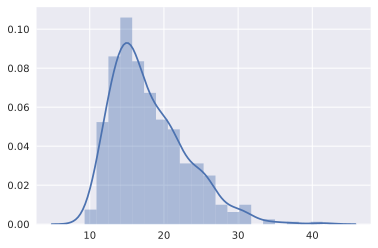

In [15]:
sns.distplot(errors)

## Bayesian Ridge

In [16]:
errors = run_all_storeitems(lm.BayesianRidge())

21.85927541939045
13.21087538982394
15.359594659023621
19.728979270347114
24.790905316066812
14.501769533928849
13.726600658224116
10.738092386911902
13.574670338179647
11.572990226320334
11.67832205943865
12.437609799880246
10.090843309186855
13.477864042415408
11.15665828249266
20.10848465586317
16.4330944376461
13.18989341893747
14.763287282682976
13.975502072382715
16.973902205155444
12.512794014032812
17.638937914887116
12.38672653449432
10.683319228702805
15.232382116530728
23.538623949590527
12.63930494578748
14.929457166657766
14.766676340457122
14.676493872688111
16.004411173170197
12.247880560078055
18.724424042888472
11.240407534541006
9.377442715853688
19.811627565147752
12.143548588607528
15.222783886662567
19.692106900014217
21.25296130435587
15.25287745212744
14.103408650471675
16.918485347791663
10.940370910625226
11.8644935463168
19.183927063411197
13.220575600834625
17.40246716460586
11.367791636597692
16.50575334496284
10.84477349185545
13.16649758801299
16.972544882

15.267241879158018
13.171630823104758
18.05797100436726
9.270710338344768
12.469642838471731
19.63688346356968
15.000608102795583
16.024334556310787
11.926818129575983
20.349243364683048
11.80116923027161
16.056994107739992
18.410805340043563
19.68263815335174
11.337378065836361
11.162327152897955
11.163707107264313
11.689437095454332
11.906201240047238
11.138582903347778
12.834734881962563
9.99176695507741
13.658895089274212
10.201803484887714
17.68090634645261
17.08401298685807
10.250900870644907
16.288080486770436
14.618758300880897
14.328005781372337
10.892527921137145
15.693286437304938
14.295831015642737
9.51995454911225
15.162162796706138
17.79032710207363
9.32843780232897
9.908866748703296
14.42663229984784
12.06477874977151
14.875218299792982
11.201997853018
21.775842316564063
13.179461735322631
11.048741128453184
16.327584073222393
9.958774648999105
12.637759357883805
16.37626587135514
21.630422922065467
16.146862214380857
12.32749123551516
16.02270627202726
11.64200847986214

In [17]:
print(f"SMAPE = {np.mean(errors)}")

SMAPE = 14.653786342514707


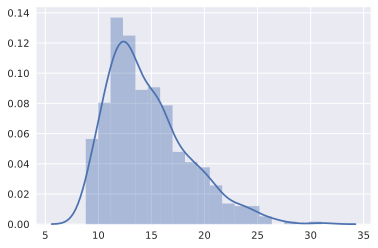

In [18]:
sns.distplot(errors)

## Plot sample forecast

In [15]:
store, item = 1,1
plot_lengths = [7, 30]

In [16]:
sales = df[(df["store"] == store) & (df["item"] == item)]["sales"]
predicted, real = train_and_predict(lm.BayesianRidge(), sales)

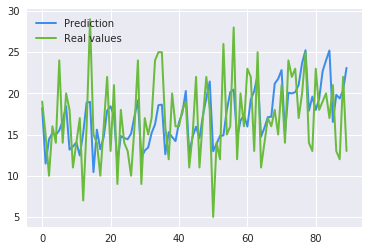

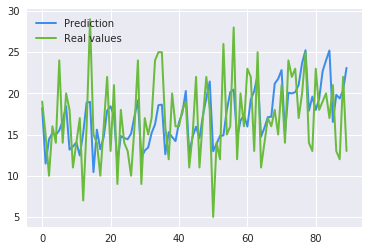

In [23]:
for pl in plot_lengths:
    plt.plot(predicted,
             color_scheme['blue'],
             lw=2,
             label='Prediction')
    plt.plot(real.values,
             color_scheme['green'],
             lw=2, 
             label='Real values')
    plt.legend(loc='upper left')
    plt.savefig(f'bayesian_ridge_{pl}.svg')
    plt.show()